In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns", None)
# Create Dataframe
df = pd.read_csv("D:\Capstone Project\indian-auto-mpg.csv")

# Print shape of dataset
print(df.shape)

(5975, 14)


In [2]:
df.isnull().sum()

Unnamed: 0           0
Name                 0
Manufacturer         0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Engine CC            0
Power                0
Seats                0
Mileage Km/L         0
Price                0
dtype: int64

In [3]:
df.duplicated().sum()

0

In [4]:
df.loc[:, 'Current_Year'] = 2023

In [5]:
df.loc[:, 'Age'] = df['Current_Year'] - df['Year']

In [6]:
df.drop(['Year'],axis=1,inplace=True)

In [7]:
df.drop(['Current_Year'],axis=1,inplace=True)

In [8]:
df.head(5)

,Unnamed: 0,Name,Manufacturer,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine CC,Power,Seats,Mileage Km/L,Price,Age
0,0,Maruti Wagon R LXI CNG,Maruti,Mumbai,72000,CNG,Manual,First,998,58.16,5,26.60,1.75,13
1,1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Pune,41000,Diesel,Manual,First,1582,126.20,5,19.67,12.50,8
2,2,Honda Jazz V,Honda,Chennai,46000,Petrol,Manual,First,1199,88.70,5,18.20,4.50,12
3,3,Maruti Ertiga VDI,Maruti,Chennai,87000,Diesel,Manual,First,1248,88.76,7,20.77,6.00,11
4,4,Audi A4 New 2.0 TDI Multitronic,Audi,Coimbatore,40670,Diesel,Automatic,Second,1968,140.80,5,15.20,17.74,10


In [9]:
df.drop(['Unnamed: 0','Name', 'Manufacturer','Location'], axis=1, inplace=True)

In [10]:
df.head(10)

,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine CC,Power,Seats,Mileage Km/L,Price,Age
0,72000,CNG,Manual,First,998,58.16,5,26.60,1.75,13
1,41000,Diesel,Manual,First,1582,126.20,5,19.67,12.50,8
2,46000,Petrol,Manual,First,1199,88.70,5,18.20,4.50,12
3,87000,Diesel,Manual,First,1248,88.76,7,20.77,6.00,11
4,40670,Diesel,Automatic,Second,1968,140.80,5,15.20,17.74,10
5,75000,LPG,Manual,First,814,55.20,5,21.10,2.35,11
6,86999,Diesel,Manual,First,1461,63.10,5,23.08,3.50,10
7,36000,Diesel,Automatic,First,2755,171.50,8,11.36,17.50,7
8,64430,Diesel,Manual,First,1598,103.60,5,20.54,5.20,10
9,65932,Diesel,Manual,Second,1248,74.00,5,22.30,1.95,11


In [11]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 7


In [12]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 3


In [13]:
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))

Num of Discrete Features : 2


In [14]:
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Continuous Features : 5


In [15]:
n_data = df[['Kilometers_Driven', 'Engine CC', 'Power', 'Seats', 'Mileage Km/L', 'Price', 'Age']]

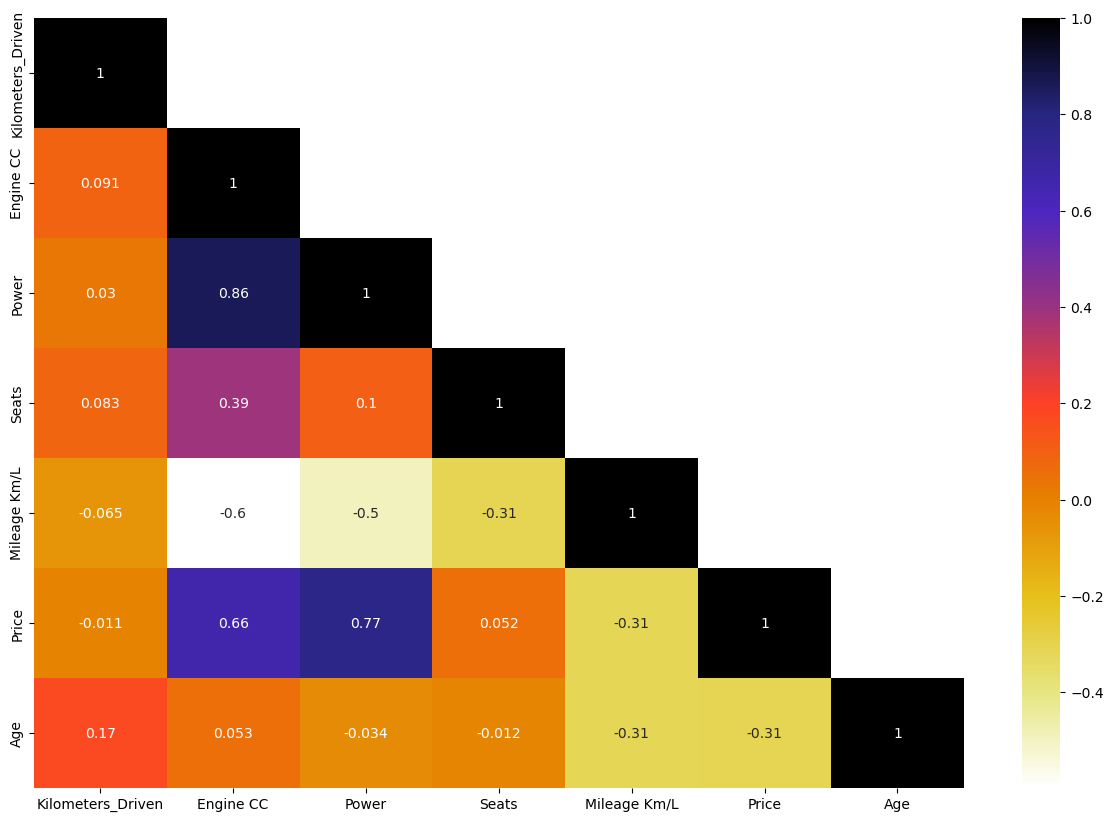

In [16]:
plt.figure(figsize = (15,10))
sns.heatmap(n_data.corr(), cmap="CMRmap_r", annot=True, mask= np.triu(n_data.corr(), k=1))
plt.show()

In [17]:
import statsmodels.api as sm
num_features = df.select_dtypes(exclude="object").columns
for i in range(0, len(num_features)-1):
    x = df.loc[:, df.columns == num_features[i]]
    y = df.Price
    model = sm.OLS(x,y)
    results = model.fit()
    rsq = results.rsquared
    vif = round(1 / (1 - rsq), 2)
    print(
        "Variance Inflation Factor of {} column is {} \n".format(
            num_features[i], vif)
        )

Variance Inflation Factor of Kilometers_Driven column is 1.13 

Variance Inflation Factor of Engine CC column is 2.57 

Variance Inflation Factor of Power column is 3.34 

Variance Inflation Factor of Seats column is 1.71 

Variance Inflation Factor of Mileage Km/L column is 1.48 

Variance Inflation Factor of Price column is inf 



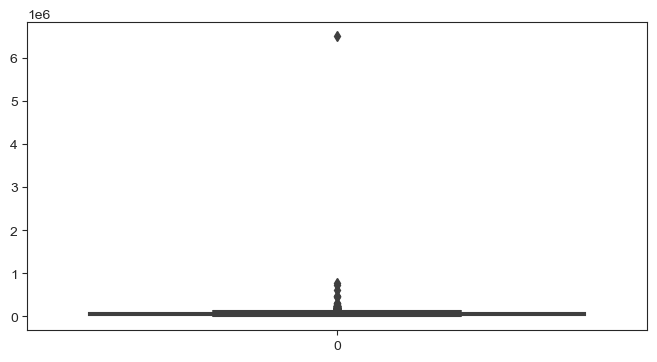

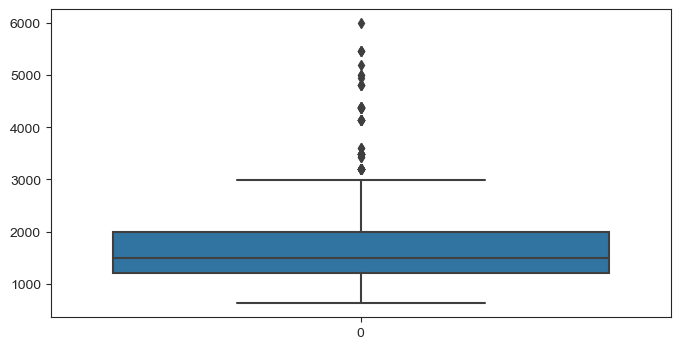

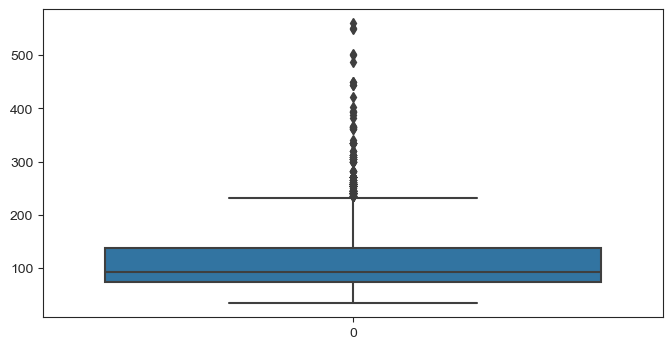

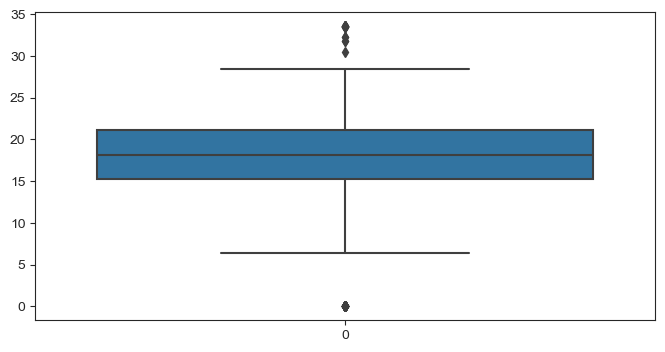

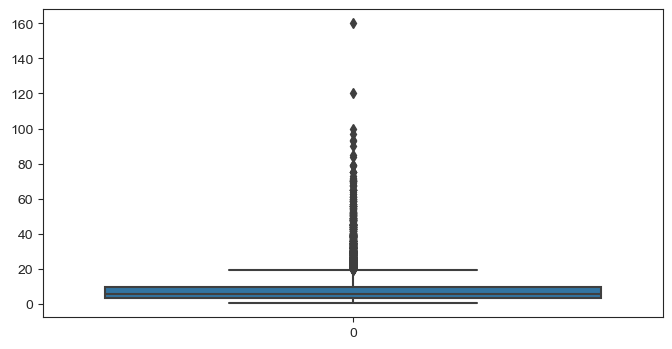

In [18]:
for i in continuous_features:
        plt.figure(figsize=(8,4))
        sns.set_style('ticks')
        ax = sns.boxplot(df[i])

In [19]:
def detect_outliers(col):
    # Finding the IQR
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    print('\n ####', col , '####')
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    df.loc[(df[col]>upper_limit), col]= upper_limit
    df.loc[(df[col]<lower_limit), col]= lower_limit    
    return df

In [20]:
for col in continuous_features:
         detect_outliers(col)


 #### Kilometers_Driven ####
percentile25 33908.0
percentile75 73000.0
Upper limit 131638.0
Lower limit -24730.0

 #### Engine CC ####
percentile25 1198.0
percentile75 1984.0
Upper limit 3163.0
Lower limit 19.0

 #### Power ####
percentile25 74.0
percentile75 138.1
Upper limit 234.25
Lower limit -22.14999999999999

 #### Mileage Km/L ####
percentile25 15.2
percentile75 21.1
Upper limit 29.950000000000003
Lower limit 6.349999999999996

 #### Price ####
percentile25 3.5
percentile75 9.95
Upper limit 19.625
Lower limit -6.174999999999999


In [21]:
df[continuous_features].skew(axis=0, skipna=True)

Kilometers_Driven    0.631002
Engine CC            1.000712
Power                1.020543
Mileage Km/L         0.022456
Price                1.064533
dtype: float64

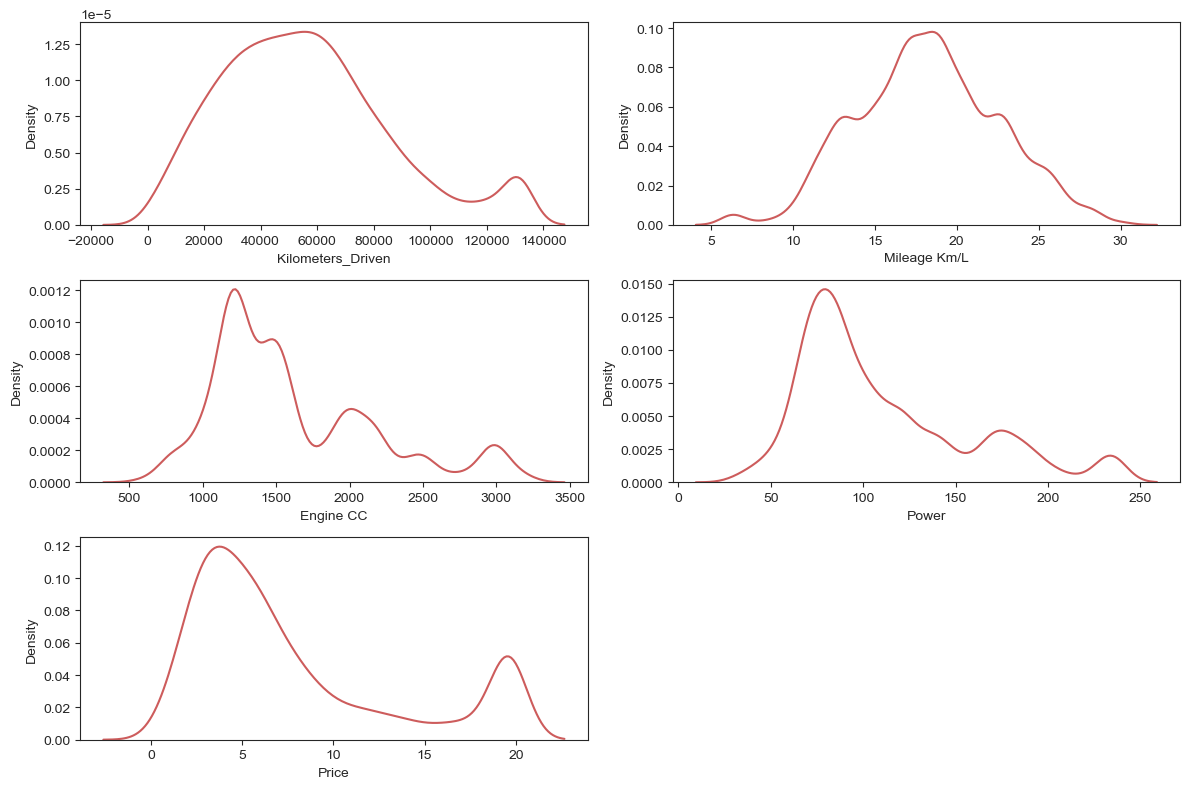

In [22]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(['Kilometers_Driven', 'Mileage Km/L', 'Engine CC', 'Power', 'Price']):
    plt.subplot(3, 2, i+1)
    sns.kdeplot(x=df[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

In [23]:
from sklearn.model_selection import train_test_split
X = df.drop(['Price'], axis=1)
y = df['Price']

In [24]:
for feature in cat_features:
    print(feature,':', X[feature].nunique())

Fuel_Type : 4
Transmission : 2
Owner_Type : 4


In [25]:
num_features = X.select_dtypes(exclude="object").columns
onehot_columns = ['Owner_Type','Fuel_Type','Transmission']
binary_columns = ['Name']

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()


preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, onehot_columns),
         ("StandardScaler", numeric_transformer, num_features),
        
    ]
)

In [26]:
X= preprocessor.fit_transform(X)

In [27]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((4780, 16), (1195, 16))

In [28]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV


In [29]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [30]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 2.3522
- Mean Absolute Error: 1.7690
- R2 Score: 0.8359
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.4901
- Mean Absolute Error: 1.8252
- R2 Score: 0.8019


Lasso
Model performance for Training set
- Root Mean Squared Error: 2.9870
- Mean Absolute Error: 2.2305
- R2 Score: 0.7354
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3.0012
- Mean Absolute Error: 2.2105
- R2 Score: 0.7122


Ridge
Model performance for Training set
- Root Mean Squared Error: 2.3513
- Mean Absolute Error: 1.7701
- R2 Score: 0.8361
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.4888
- Mean Absolute Error: 1.8244
- R2 Score: 0.8021


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 1.4441
- Mean Absolute Error: 0.8805
- R2 Score: 0.9382
-----------------------

In [31]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
5,Random Forest Regressor,0.926934
3,K-Neighbors Regressor,0.880246
4,Decision Tree,0.876230
2,Ridge,0.802109
0,Linear Regression,0.801906
6,AdaBoost Regressor,0.785220
1,Lasso,0.712237


In [32]:
#Initialize few parameter for Hyperparamter tuning
knn_params = {"n_neighbors": [2, 3, 10, 20, 40, 50]}

rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

In [33]:
# Models list for Hyperparameter tuning
randomcv_models = [('KNN', KNeighborsRegressor(), knn_params),
                   ("RF", RandomForestRegressor(), rf_params),
                   ]

In [34]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for KNN -------------------
{'n_neighbors': 10}
---------------- Best Params for RF -------------------
{'n_estimators': 200, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}


In [35]:
models = {
    "Random Forest Regressor": RandomForestRegressor(**model_param['RF'], n_jobs=-1),
     "K-Neighbors Regressor": KNeighborsRegressor(**model_param['KNN'], n_jobs=-1),
}

model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 0.5477
- Mean Absolute Error: 0.3396
- R2 Score: 0.9911
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.5259
- Mean Absolute Error: 0.9274
- R2 Score: 0.9256


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 1.6408
- Mean Absolute Error: 1.0391
- R2 Score: 0.9202
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.0006
- Mean Absolute Error: 1.2284
- R2 Score: 0.8721




In [36]:
pd.DataFrame(list(zip(model_list, r2_list*100)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
0,Random Forest Regressor,0.925614
1,K-Neighbors Regressor,0.872124
